## Import the required libraries

In [1]:
import pandas as pd
import glob

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

### Append all the sales CSV files into one sales_data CSV file list

In [3]:
sales_2022_csv_files = glob.glob('Data Sets/Used Car Sales Raw Data/2022 Sales Data/*.csv')
sales_2023_csv_files = glob.glob('Data Sets/Used Car Sales Raw Data/2023 Sales Data/*.csv')
sales_2024_csv_files = glob.glob('Data Sets/Used Car Sales Raw Data/2024 Sales Data/*.csv')

sales_data_list = []

for file in sales_2022_csv_files:
    df = pd.read_csv(file, sep = '\t')
    sales_data_list.append(df)

for file in sales_2023_csv_files:
    df = pd.read_csv(file, sep = '\t')
    sales_data_list.append(df)

for file in sales_2024_csv_files:
    df = pd.read_csv(file, sep = '\t')
    sales_data_list.append(df)

sales_data = pd.concat(sales_data_list, ignore_index = True)


In [4]:
sales_data.columns

Index(['Sale Date', 'Sales Rep ID', 'Region ID', 'Car Model ID', 'Units Sold',
       'Revenue'],
      dtype='object')

### Import the lookup tables

In [5]:
car_model = pd.read_csv('Data Sets/Used Car Sales Raw Data/Car Model Lookup Table.csv', sep = '\t')
region = pd.read_csv('Data Sets/Used Car Sales Raw Data/Region Lookup Table.csv', sep = '\t')
sales_rep = pd.read_csv('Data Sets/Used Car Sales Raw Data/Sales Rep Lookup Table.csv', sep = '\t')

In [6]:
car_model.columns

Index(['Car Model ID', 'Car Model', 'Color', 'Price'], dtype='object')

### Merge the sales_data CSV file with car_model, region and sales_rep csv files.

In [7]:
sales_data = pd.merge(sales_data, car_model, on = 'Car Model ID', how = 'left')
sales_data = pd.merge(sales_data, region, on = 'Region ID', how = 'left')
sales_data = pd.merge(sales_data, sales_rep, on = 'Sales Rep ID', how = 'left')

In [8]:
sales_data.head()

,Sale Date,Sales Rep ID,Region ID_x,Car Model ID,Units Sold,Revenue,Car Model,Color,Price,Region,Sales Rep Name,Region ID_y
0,04/01/2022,1,1,2,2,24000,Honda Civic,Red,12000,North,Julie,3
1,04/02/2022,2,2,3,1,13000,Ford Focus,White,13000,South,Adam,4
2,04/03/2022,3,3,4,2,50000,BMW 3 Series,Black,25000,East,Emily,1
3,04/04/2022,4,4,5,1,23000,Audi A4,Gray,23000,West,James,2
4,04/05/2022,5,1,6,2,54000,Mercedes C-Class,Silver,27000,North,Sarah,3


In [9]:
sales_data.drop(sales_data.columns[[1,2,3,11]], axis = 1, inplace = True)

In [10]:
sales_data.head()

,Sale Date,Units Sold,Revenue,Car Model,Color,Price,Region,Sales Rep Name
0,04/01/2022,2,24000,Honda Civic,Red,12000,North,Julie
1,04/02/2022,1,13000,Ford Focus,White,13000,South,Adam
2,04/03/2022,2,50000,BMW 3 Series,Black,25000,East,Emily
3,04/04/2022,1,23000,Audi A4,Gray,23000,West,James
4,04/05/2022,2,54000,Mercedes C-Class,Silver,27000,North,Sarah


In [11]:
start_index = 1201
sales_data['Invoice_ID'] = ["OLX-" + str(i) for i in range(start_index, start_index + len(sales_data))]

In [12]:
sales_data.head()

,Sale Date,Units Sold,Revenue,Car Model,Color,Price,Region,Sales Rep Name,Invoice_ID
0,04/01/2022,2,24000,Honda Civic,Red,12000,North,Julie,OLX-1201
1,04/02/2022,1,13000,Ford Focus,White,13000,South,Adam,OLX-1202
2,04/03/2022,2,50000,BMW 3 Series,Black,25000,East,Emily,OLX-1203
3,04/04/2022,1,23000,Audi A4,Gray,23000,West,James,OLX-1204
4,04/05/2022,2,54000,Mercedes C-Class,Silver,27000,North,Sarah,OLX-1205


In [13]:
sales_data.shape

(1075, 9)

In [14]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sale Date       1075 non-null   object
 1   Units Sold      1075 non-null   int64 
 2   Revenue         1075 non-null   int64 
 3   Car Model       1075 non-null   object
 4   Color           1075 non-null   object
 5   Price           1075 non-null   int64 
 6   Region          1075 non-null   object
 7   Sales Rep Name  1075 non-null   object
 8   Invoice_ID      1075 non-null   object
dtypes: int64(3), object(6)
memory usage: 75.7+ KB


In [15]:
sales_data.isnull().sum()

Sale Date         0
Units Sold        0
Revenue           0
Car Model         0
Color             0
Price             0
Region            0
Sales Rep Name    0
Invoice_ID        0
dtype: int64

In [16]:
sales_data.duplicated().sum()

0

In [17]:
sales_data.dtypes

Sale Date         object
Units Sold         int64
Revenue            int64
Car Model         object
Color             object
Price              int64
Region            object
Sales Rep Name    object
Invoice_ID        object
dtype: object

In [18]:
sales_data.columns

Index(['Sale Date', 'Units Sold', 'Revenue', 'Car Model', 'Color', 'Price',
       'Region', 'Sales Rep Name', 'Invoice_ID'],
      dtype='object')

In [19]:
sales_data['Sale Date'] = pd.to_datetime(sales_data['Sale Date'], errors = 'coerce')

In [20]:
sales_data.head()

,Sale Date,Units Sold,Revenue,Car Model,Color,Price,Region,Sales Rep Name,Invoice_ID
0,2022-04-01,2,24000,Honda Civic,Red,12000,North,Julie,OLX-1201
1,2022-04-02,1,13000,Ford Focus,White,13000,South,Adam,OLX-1202
2,2022-04-03,2,50000,BMW 3 Series,Black,25000,East,Emily,OLX-1203
3,2022-04-04,1,23000,Audi A4,Gray,23000,West,James,OLX-1204
4,2022-04-05,2,54000,Mercedes C-Class,Silver,27000,North,Sarah,OLX-1205


In [21]:
sales_data.dtypes

Sale Date         datetime64[ns]
Units Sold                 int64
Revenue                    int64
Car Model                 object
Color                     object
Price                      int64
Region                    object
Sales Rep Name            object
Invoice_ID                object
dtype: object

In [22]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Sale Date       1075 non-null   datetime64[ns]
 1   Units Sold      1075 non-null   int64         
 2   Revenue         1075 non-null   int64         
 3   Car Model       1075 non-null   object        
 4   Color           1075 non-null   object        
 5   Price           1075 non-null   int64         
 6   Region          1075 non-null   object        
 7   Sales Rep Name  1075 non-null   object        
 8   Invoice_ID      1075 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 75.7+ KB


In [23]:
sales_data.head()

,Sale Date,Units Sold,Revenue,Car Model,Color,Price,Region,Sales Rep Name,Invoice_ID
0,2022-04-01,2,24000,Honda Civic,Red,12000,North,Julie,OLX-1201
1,2022-04-02,1,13000,Ford Focus,White,13000,South,Adam,OLX-1202
2,2022-04-03,2,50000,BMW 3 Series,Black,25000,East,Emily,OLX-1203
3,2022-04-04,1,23000,Audi A4,Gray,23000,West,James,OLX-1204
4,2022-04-05,2,54000,Mercedes C-Class,Silver,27000,North,Sarah,OLX-1205


In [24]:
sales_data['Year'] = sales_data['Sale Date'].dt.year.astype(str)
sales_data['Quarter'] = "Q" + sales_data['Sale Date'].dt.quarter.astype(str)

# Formatting the monthname (%B for Complete month name, %b for short name of the month using dt.strftime() method.
sales_data['Month'] = sales_data['Sale Date'].dt.strftime('%B')  

In [25]:
sales_data.head()

,Sale Date,Units Sold,Revenue,Car Model,Color,Price,Region,Sales Rep Name,Invoice_ID,Year,Quarter,Month
0,2022-04-01,2,24000,Honda Civic,Red,12000,North,Julie,OLX-1201,2022,Q2,April
1,2022-04-02,1,13000,Ford Focus,White,13000,South,Adam,OLX-1202,2022,Q2,April
2,2022-04-03,2,50000,BMW 3 Series,Black,25000,East,Emily,OLX-1203,2022,Q2,April
3,2022-04-04,1,23000,Audi A4,Gray,23000,West,James,OLX-1204,2022,Q2,April
4,2022-04-05,2,54000,Mercedes C-Class,Silver,27000,North,Sarah,OLX-1205,2022,Q2,April


In [26]:
# Adding this abbreviations to convert the complete month name to short name for the months. 

month_abbreviations = {
    'January': 'Jan',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Apr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Aug',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dec'
}

sales_data['Month'] = sales_data['Month'].map(month_abbreviations)

In [27]:
sales_data.head()

,Sale Date,Units Sold,Revenue,Car Model,Color,Price,Region,Sales Rep Name,Invoice_ID,Year,Quarter,Month
0,2022-04-01,2,24000,Honda Civic,Red,12000,North,Julie,OLX-1201,2022,Q2,Apr
1,2022-04-02,1,13000,Ford Focus,White,13000,South,Adam,OLX-1202,2022,Q2,Apr
2,2022-04-03,2,50000,BMW 3 Series,Black,25000,East,Emily,OLX-1203,2022,Q2,Apr
3,2022-04-04,1,23000,Audi A4,Gray,23000,West,James,OLX-1204,2022,Q2,Apr
4,2022-04-05,2,54000,Mercedes C-Class,Silver,27000,North,Sarah,OLX-1205,2022,Q2,Apr


In [28]:
sales_data['Sales'] = sales_data['Price'] * sales_data['Units Sold']

In [29]:
sales_data.dtypes

Sale Date         datetime64[ns]
Units Sold                 int64
Revenue                    int64
Car Model                 object
Color                     object
Price                      int64
Region                    object
Sales Rep Name            object
Invoice_ID                object
Year                      object
Quarter                   object
Month                     object
Sales                      int64
dtype: object

In [30]:
# Finding the Total Sales By Region

total_sales_by_region = sales_data.groupby('Region')['Sales'].sum().reset_index()
total_sales_by_region['Sales'] = pd.to_numeric(total_sales_by_region['Sales'])/1_000_000

# Finding the Total Sales By Car Model

total_sales_by_car_model = sales_data.groupby('Car Model')['Sales'].sum().reset_index()
total_sales_by_car_model['Sales'] = pd.to_numeric(total_sales_by_car_model['Sales'])/1_000_000

# Finding the Total Sales By Color

total_sales_by_color = sales_data.groupby('Color')['Sales'].sum().reset_index()
total_sales_by_color['Sales'] = pd.to_numeric(total_sales_by_color['Sales'])/1_000_000

# Finding the Total Revenue By Sales Rep Name

revenue_by_sales_rep = sales_data.groupby('Sales Rep Name')['Revenue'].sum().reset_index()
revenue_by_sales_rep['Revenue'] = pd.to_numeric(revenue_by_sales_rep['Revenue'])/1_000_000

# Finding the Average Sales By Car Model

avg_sales_by_car_model = sales_data.groupby('Car Model')['Sales'].mean().reset_index()
avg_sales_by_car_model['Sales'] = pd.to_numeric(avg_sales_by_car_model['Sales'])/1_000

In [31]:
total_sales_by_region

,Region,Sales
0,East,5.886
1,North,11.736
2,South,4.873
3,West,6.934


In [32]:
total_sales_by_color

,Color,Sales
0,Black,7.058
1,Blue,5.683
2,Gray,3.335
3,Green,2.112
4,Red,1.968
5,Silver,4.725
6,White,2.392
7,Yellow,2.156


In [33]:
revenue_by_sales_rep

,Sales Rep Name,Revenue
0,Adam,4.716
1,Emily,4.932
2,James,7.039
3,Julie,6.737
4,Sarah,5.832


In [34]:
avg_sales_by_car_model

,Car Model,Sales
0,Audi A4,30.879630
1,BMW 3 Series,43.518519
2,Chevrolet Malibu,32.019417
3,Ford Focus,21.745455
4,Honda Civic,17.890909
5,Hyundai Elantra,20.730769
6,Kia Optima,23.117647
7,Mercedes C-Class,44.575472
8,Nissan Altima,20.307692
9,Toyota Camry,19.875000


In [35]:
total_sales_by_region.dtypes

Region     object
Sales     float64
dtype: object

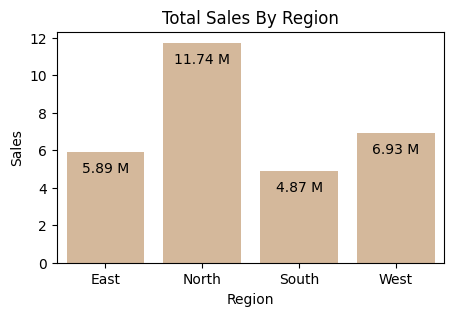

In [52]:
plt.figure(figsize = (5,3))
bar_plot_1 = sns.barplot(data = total_sales_by_region, x = 'Region', y = 'Sales', color = '#ddb892')

for index, row in total_sales_by_region.iterrows():
    bar_plot_1.text(index, row.Sales - 0.5, f'{row.Sales:,.2f} M', color = 'black', ha = 'center', va = 'top')

plt.title('Total Sales By Region')
plt.show()

Text(0.5, 1.0, 'Total Sales by Car Model')

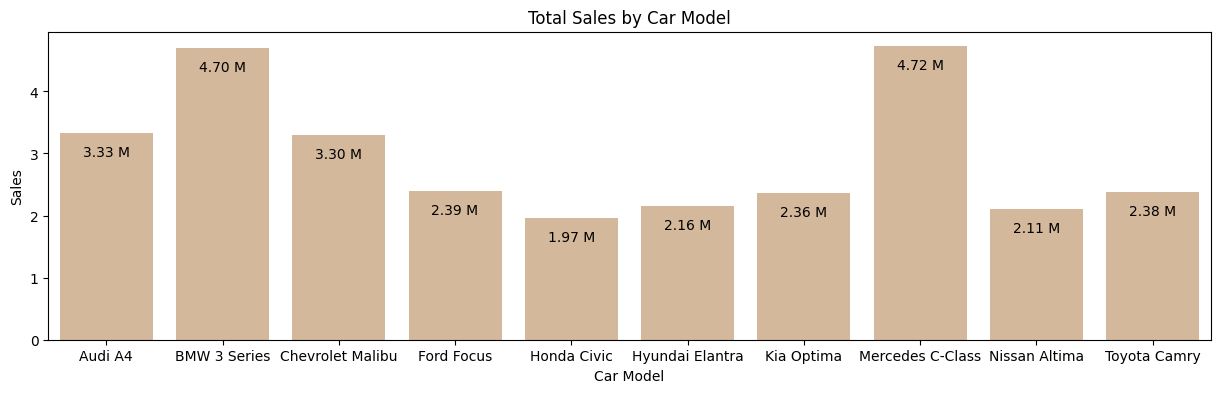

In [54]:
plt.figure(figsize = (15,4))
bar_plot_2 = sns.barplot(data = total_sales_by_car_model, x = 'Car Model', y = 'Sales', color= '#ddb892')

for index, row in total_sales_by_car_model.iterrows():
    bar_plot_2.text(index, row.Sales - 0.2, f'{row.Sales:.2f} M', color = 'black',ha = 'center', va = 'top')

plt.title('Total Sales by Car Model')

Text(0.5, 1.0, 'Total Sales by Color')

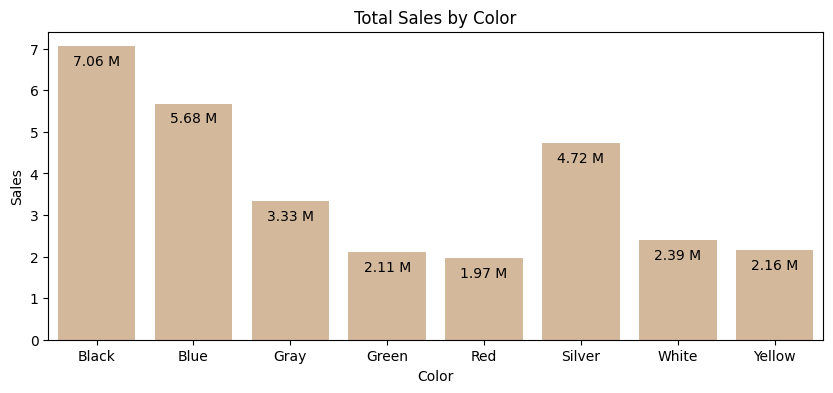

In [55]:
plt.figure(figsize = (10,4))
bar_plot_3 = sns.barplot(data = total_sales_by_color, x = 'Color', y = 'Sales', color = '#ddb892')

for index, row in total_sales_by_color.iterrows():
    bar_plot_3.text(index, row.Sales - 0.2, f'{row.Sales:.2f} M', color = 'black',ha = 'center', va = 'top')

plt.title('Total Sales by Color')

In [39]:
revenue_by_sales_rep

,Sales Rep Name,Revenue
0,Adam,4.716
1,Emily,4.932
2,James,7.039
3,Julie,6.737
4,Sarah,5.832


Text(0.5, 1.0, 'Total Revenue by Sales Representative')

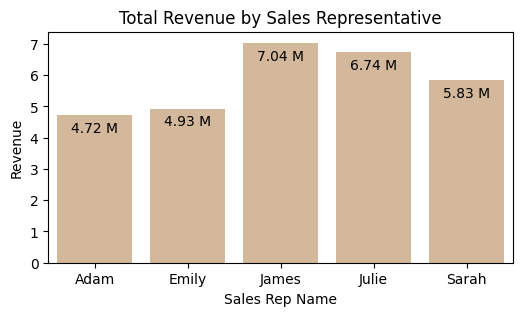

In [56]:
plt.figure(figsize = (6,3))
bar_plot_4 = sns.barplot(data = revenue_by_sales_rep, x = 'Sales Rep Name', y = 'Revenue', color = '#ddb892')

for index, row in revenue_by_sales_rep.iterrows():
    bar_plot_4.text(index, row.Revenue - 0.2, f'{row.Revenue:.2f} M', color = 'black',ha = 'center', va = 'top')

plt.title('Total Revenue by Sales Representative')

Text(0.5, 1.0, 'Average Sales by Car Model')

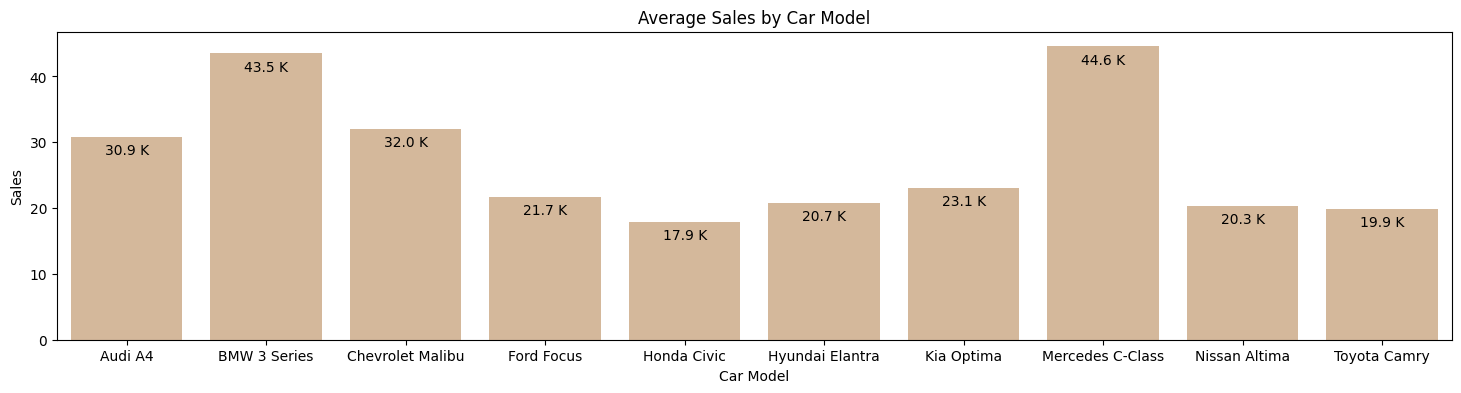

In [57]:
plt.figure(figsize = (18,4))
bar_plot_2 = sns.barplot(data = avg_sales_by_car_model, x = 'Car Model', y = 'Sales', color = '#ddb892')

for index, row in avg_sales_by_car_model.iterrows():
    bar_plot_2.text(index, row.Sales-1, f'{row.Sales:,.1f} K', color = 'black',ha = 'center', va = 'top')

plt.title('Average Sales by Car Model')